In [10]:
from time import perf_counter
import sys, os
sys.path.insert(0, os.path.abspath('..'))
import warnings
warnings.filterwarnings('ignore')

from preprocess import prepare_dataset
from validation.models import RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV
from validation import set_baseline, get_best_models, plot_train_val

X_train, X_val, y_train, y_val = prepare_dataset(kind='cv')

In [11]:
X_train.head()

,Achievement_rate,Is_Multiplayer,Price,Rating,Rating_group,Required_Age,Age_group,Type_game,Type_dlc,Type_mod,...,Genre_freq_enc,Developer_freq_enc,Publisher_freq_enc,Genre_mean_enc,Developer_mean_enc,Publisher_mean_enc,Year,Month,Day,Weekend
appid,,,,,,,,,,,,,,,,,,,,,
317470,-0.736982413,0,-0.970299678,-0.693799059,0,0,0,1,0,0,...,-0.596050279,-0.230038572,-0.610845178,-1.321512107,-0.331692548,-0.397004866,0.400000229,0.446580074,-0.272384557,1
299720,0.359495782,1,-0.194419386,-0.693799059,0,0,0,1,0,0,...,1.025289180,-0.230038572,-0.494276332,-0.980444226,-0.438010673,-0.530298501,0.400000229,0.131452077,0.989319490,1
310760,0.756035488,1,0.116243394,-0.693799059,0,0,0,1,0,0,...,1.025289180,-0.291811846,-0.649701460,-0.980444226,-0.345639841,-0.413698468,0.400000229,0.131452077,0.186416914,1
340,-0.736982413,0,2.135551460,-0.693799059,0,0,0,1,0,0,...,1.189690733,0.573013994,0.049711618,0.970332055,9.122957731,10.515041419,-1.321370667,1.076836068,1.333420594,1
230700,-0.107530453,0,0.193909088,1.607390869,2,0,0,1,0,0,...,1.025289180,-0.291811846,-0.416563767,-0.980444226,-0.244261325,-0.344067209,0.208736796,-0.813931914,-0.042983821,1


In [12]:
baseline = set_baseline(X_train, X_val, y_train, y_val)

Baseline loss: 2159445.526444445
Baseline score: 0.4124612701450111


In [13]:
from validation.models import RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV
models = [RidgeCV, LassoCV, KnnCV, SvrCV, RandomForestCV, ExtraTreeCV]
results = get_best_models(models, X_train, X_val, y_train, y_val)

Start training Ridge with {'alpha': 0.1}
Start training Ridge with {'alpha': 0.5}
Start training Ridge with {'alpha': 1.0}
Start training Ridge with {'alpha': 10.0}
Start training Ridge with {'alpha': 20.0}
Start training Lasso with {'alpha': 0.1}
Start training Lasso with {'alpha': 0.5}
Start training Lasso with {'alpha': 1.0}
Start training Lasso with {'alpha': 10.0}
Start training Lasso with {'alpha': 20.0}
Start training KNN with {'n_neighbors': 5}
Start training KNN with {'n_neighbors': 6}
Start training KNN with {'n_neighbors': 7}
Start training KNN with {'n_neighbors': 8}
Start training KNN with {'n_neighbors': 9}
Start training KNN with {'n_neighbors': 10}
Start training SVR with {'gamma': 0.001, 'C': 0.001}
Start training SVR with {'gamma': 0.001, 'C': 0.01}
Start training SVR with {'gamma': 0.001, 'C': 0.1}
Start training SVR with {'gamma': 0.001, 'C': 1.0}
Start training SVR with {'gamma': 0.001, 'C': 10.0}
Start training SVR with {'gamma': 0.001, 'C': 100.0}
Start training 

In [15]:
import pandas as pd
pd.options.display.float_format = '{:,.9f}'.format
pd.DataFrame(results)

,model_name,best_model,train_loss,val_loss,train_score,val_score
0,Ridge,Ridge(alpha=0.1),"1,844,101.625296009","2,159,477.337951793",0.546365574,0.412452615
1,Lasso,Lasso(alpha=0.1),"1,844,117.125113352","2,160,044.656524270",0.546361762,0.412298260
2,KNN,KNeighborsRegressor(n_neighbors=10),"1,747,441.747825434","2,117,218.256492015",0.570143140,0.423950403
3,SVR,"SVR(C=100.0, gamma=0.01)","2,863,024.421778463","2,794,245.312930877",0.295718619,0.239745888
4,Random Forest,"RandomForestRegressor(max_depth=30, n_estimato...","720,995.241661435","2,054,823.587301031",0.822640869,0.440926652
5,Extra Tree,ExtraTreesRegressor(n_estimators=50),"472,261.157901541","2,074,059.355905559",0.883827488,0.435693013


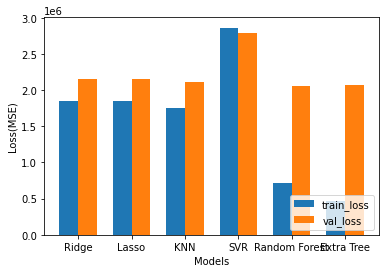

In [16]:
plot_train_val(results, type='loss', label='Loss(MSE)')

In [17]:
winner_model = sorted(results, key=lambda x: x['val_score'], reverse=True)[0]['best_model']

X_train, X_test, y_train, y_test = prepare_dataset(kind='train')
winner_model.fit(X_train, y_train)
print(winner_model.score(X_test, y_test))

0.7598693208041973


In [18]:
import numpy as np
float_formatter = "{:.10f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

sorted(zip(X_train.columns, winner_model.feature_importances_), key=lambda x: x[1], reverse=True)[:5]

[('Developer_mean_enc', 0.5451621448603758),
 ('Publisher_mean_enc', 0.10703113651653842),
 ('Rating', 0.05920413718156119),
 ('Year', 0.04489303874377156),
 ('Day', 0.035973625434386494)]